In [22]:
#Imports
import time

import numpy as np
from scipy.stats import norm
import gurobipy as gb

#Set seed for reproducibility of instances
np.random.seed(25)

def instance_generator(n=50000):
    '''
    Function that generates hard Knapsack problem instances.
    Input:
        -n: desired size of set of items I, defaulted at 50,000 as we use this number in our study
    Returns:
        -v: array of values for all i items
        -w: array of weights of all i items
    
    ''' 
    v = np.round(norm.rvs(100, 10, size=n))
    w = np.zeros(n)
    for i in range(n):
        w[i] = round(norm.rvs(v[i], 5))
    return v, w

v, w = instance_generator()

# Problem size set-up
N = [50, 100, 500, 1000, 5000, 10000, 50000]

# Capacity constraint function based on the problem size
def W(n):
    return 0.45*np.sum(w[0:n])

In [25]:
# Binary problem
def binary_method(n, v=v, w=w):
    '''
    Function that runs the Gurobi-binary problem.
    Input:
        -n: Input problem size
    Output:
        -obj_val: Outcome of the optimizatoin
        -running_time: Time to run the algorithm on the problem size
    '''
    # Selecting relevant i for problem size
    W_gb = W(n)

    start_time = time.time()

    m = gb.Model("Binary model")
    x = m.addVars(n, vtype=gb.GRB.BINARY, name="x")

    m.setObjective(gb.quicksum(v[i]*x[i] for i in range(n)), gb.GRB.MAXIMIZE)

    m.addConstr(gb.quicksum(w[i]*x[i] for i in range(n)) <= W_gb)

    m.update()
    m.Params.LogToConsole = 0
    m.optimize()
    
    obj_val = m.objVal
    running_time = time.time() - start_time
    # print(len([i for i in range(n) if x[i].X==1]))
    return obj_val, running_time    

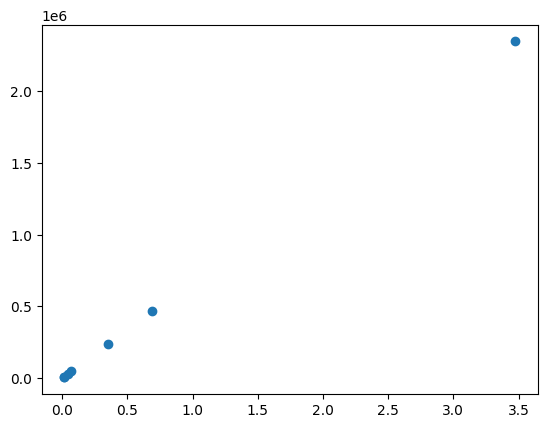

In [27]:
optimal_solution_binary = [binary_method(n)[0] for n in N]
running_time_binary = [binary_method(n)[1] for n in N]

array([103., 110.,  83., ..., 104., 102., 109.])